<a href="https://colab.research.google.com/github/Samuel-Wamwitha/House-Prices-Predictions/blob/master/Samuel_Wamwitha_Core_IP_Week_7_11_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning Week 7 : Regression

## 1. Defining the Question

### a) Specifying the Question

Create a model that would allow Hass Consulting Company to accurately predict the sale of prices upon being provided with the predictor variables.

### b) Defining the metrics for success

Building models and determine which one of the models will help the company to accurately predict the sale of prices.

### c) Understanding the context

Hass Consulting Company is a realestate leader with over 25 years of experience and they would like to know which factor affect prices of houses. These factors will help Hass company to predict house prices and set the prices of their houses appropriately.

### d) Recording the Experimental Design



1.   Perform EDA
2.   Check for Multicollinearity
3.   Build the Models
4.   Create residual plots
5.   Assess Heteroscedasticity



### e) Data Revalence

The data was about prices of the houses and features that have influence on how houses are priced. This was relevant to to Hass Consulting Company, a real estate company that want to study the factors that affect housing prices.

## 2. Reading the Data

In [301]:
# Loading the dataset
import pandas as pd
import numpy as np
import seaborn as sns

house = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')

## 3. Checking the Data

In [302]:
# Determining the number of records
house.shape

(21613, 20)

In [303]:
# Previewing the top of the dataset
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [304]:
# Previewing the bottom of our dataset
house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [305]:
# Checking whether each column has an appropriate datatype
house.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [306]:
# Checking for duplicates
house.duplicated().sum()

3

In [307]:
# Checking the columns
house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## 4. Tidying the Dataset

In [308]:
prices = house.drop(['id', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'], axis = 1)

In [309]:
prices.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503


In [310]:
# Removing duplicates
prices.drop_duplicates(inplace = True)

In [311]:
# Changing datatypes of bathrooms column
prices['bathrooms'] = prices.bathrooms.astype(int)

In [312]:
# Changing datatypes of floors column
prices['floors'] = prices.floors.astype(int)

In [313]:
# Checking the unique values of bathrooms column
prices.bathrooms.unique()

array([1, 2, 3, 4, 0, 5, 6, 8, 7])

In [314]:
# Checking the unique values of bedrooms column
prices.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

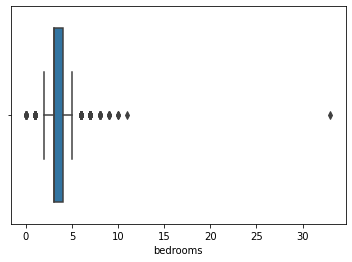

In [315]:
# Checking for Outliers in bedrooms column
sns.boxplot(prices.bedrooms)

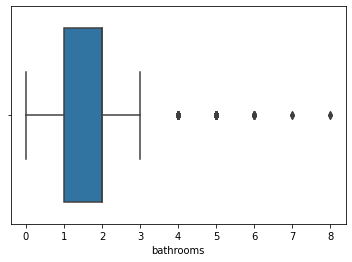

In [316]:
# Checking for Outliers in bedrooms column
sns.boxplot(prices.bathrooms)

In [317]:
# Dealing with outliers in bedrooms column
bd, bd1 = np.percentile(prices.bedrooms, [25, 75]) 
iqr = bd1 - bd
upper_bound = bd1 + (1.5 * iqr)
lower_bound = bd - (1.5 * iqr)
prices = prices[~((prices.bedrooms>upper_bound) | (prices.bedrooms<lower_bound))]

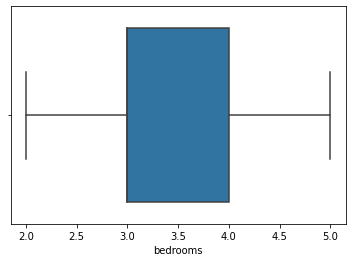

In [318]:
sns.boxplot(prices.bedrooms)

In [319]:
# Dealing with outliers in bathrooms column
bt, bt1 = np.percentile(prices.bathrooms, [25, 75]) 
iqr = bt1 - bt
upper_bound = bt1 + (1.5 * iqr)
lower_bound = bt - (1.5 * iqr)
prices = prices[~((prices.bathrooms>upper_bound) | (prices.bathrooms<lower_bound))]

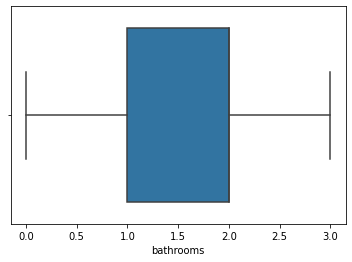

In [320]:
sns.boxplot(prices.bathrooms)

In [321]:
# Checking for missing values
prices.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [322]:
prices.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1340,5650
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1690,7639
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,2720,8062
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1360,5000
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1800,7503


## 5. Exploratory Data Analysis

### Univariate Analysis

In [323]:
import matplotlib.pyplot as plt
import seaborn as sns

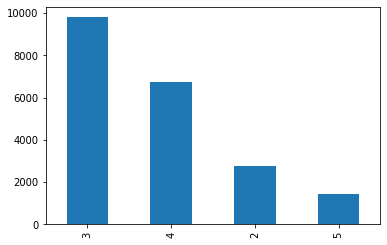

In [324]:
# Plotting value counts of bedrooms
prices['bedrooms'].value_counts().plot(kind='bar')

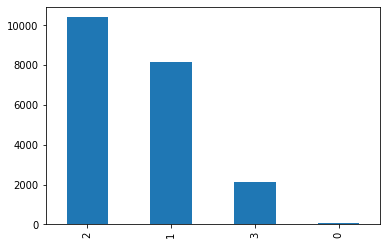

In [325]:
# Plotting value counts of bathrooms
prices['bathrooms'].value_counts().plot(kind='bar')

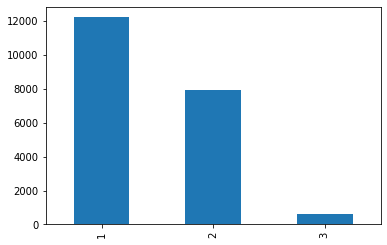

In [326]:
# Plotting value counts of floors
prices['floors'].value_counts().plot(kind='bar')

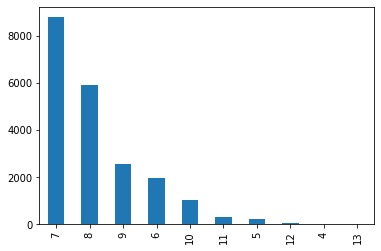

In [327]:
# Plotting value counts of grade
prices['grade'].value_counts().plot(kind='bar')

#### Central Tendency

In [328]:
# Getting the mean of prices
prices.price.mean()

521418.2812786269

In [329]:
# Getting the mean of prices
prices.price.median()

449000.0

In [330]:
# Getting the mean of prices
prices.price.mode()

0    450000.0
dtype: float64

In [331]:
# Getting the mean of bedrooms
prices.bedrooms.mean()

3.331758353020587

In [332]:
# Getting the mean of bedrooms
prices.bedrooms.median()

3.0

In [333]:
# Getting the mean of bedrooms
prices.bedrooms.mode()

0    3
dtype: int64

In [334]:
# Getting the mean of bathrooms
prices.bathrooms.mean()

1.7040644134805458

In [335]:
# Getting the mean of bathrooms
prices.bathrooms.median()

2.0

In [336]:
# Getting the mean of bathrooms
prices.bathrooms.mode()

0    2
dtype: int64

#### Dispersion

In [337]:
# Getting the Standard deviation of price
prices['price'].std()

312657.8044245662

In [338]:
# Getting the Maximum value of price
prices['price'].max()

4490000.0

In [339]:
# Getting the Minimum value of price
prices['price'].min()

78000.0

In [340]:
# Getting the Standard deviation of bedrooms
prices['bedrooms'].std()

0.792569481175758

In [341]:
# Getting the Standard deviation of bathrooms
prices['bathrooms'].std()

0.6460154322947881

Observations

From the analysis the following observations were made:

- Most houses sold had 2 bathrooms
- Most houses sold had 3 bedrooms
- Most houses sold only had 1 floor
- The average prices of the houses was 521418.28 
- Most houses were priced 450000

### Bivariate Analysis

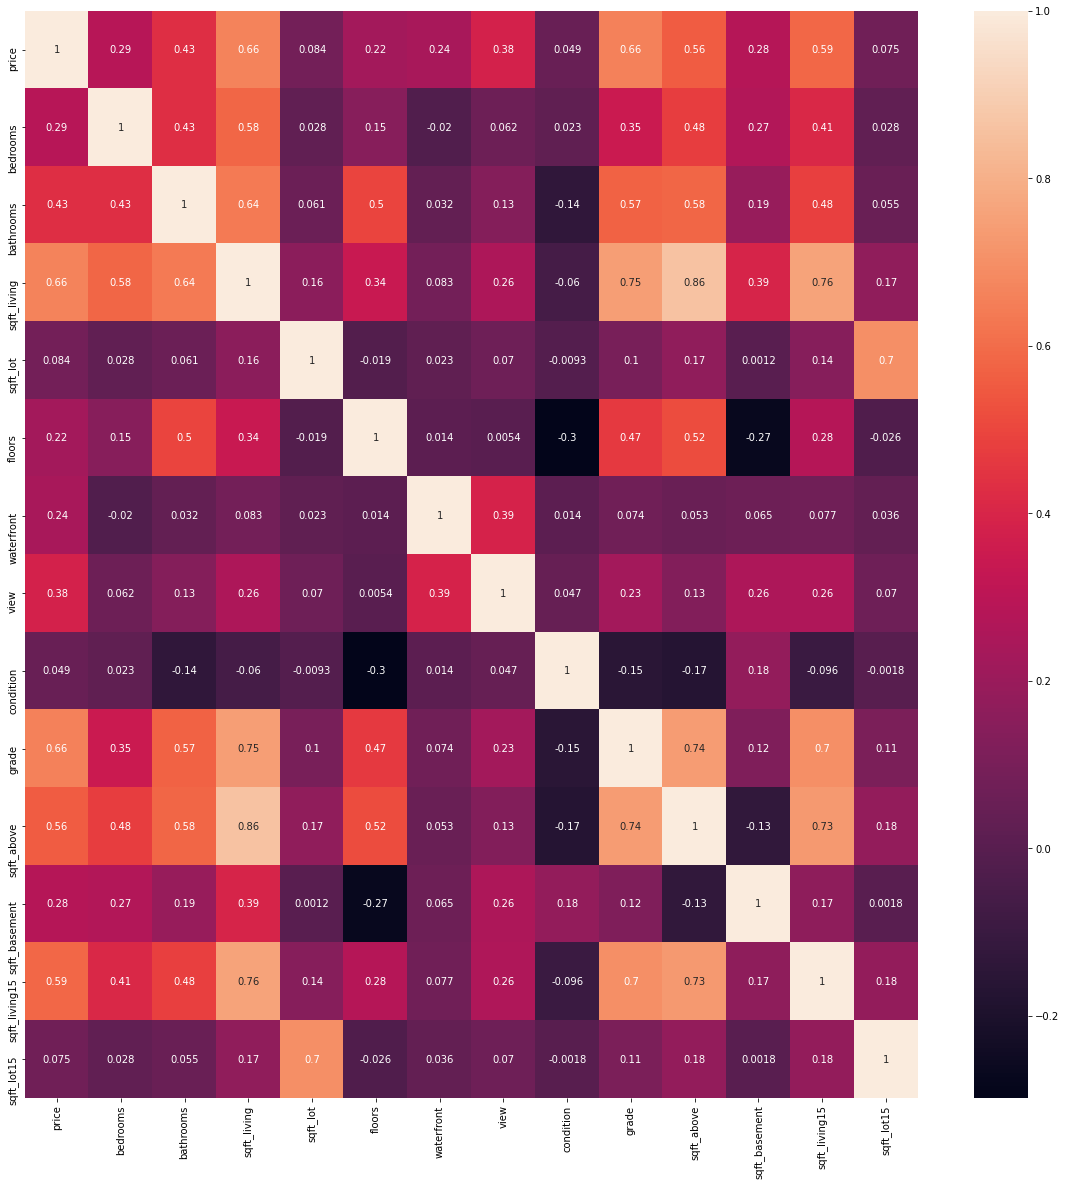

In [343]:
# Getting the correlations of the dataset
plt.subplots(figsize=(20,20))
sns.heatmap(prices.corr(),annot=True)

Observations

- Sqft_above and sqft_living have a high correlation of 0.86

- Sqft_living and sqft_living15 also had a correlation of 0.76

- Sqft_living, grade, sqft_above and sqft_living15 all have a high correlation with price compared to the other variables.

In [189]:
bd = prices.groupby('bedrooms')['price'].mean().reset_index()
bd

,bedrooms,price
0,2,401439.011236
1,3,464065.888855
2,4,616116.341855
3,5,697127.756181


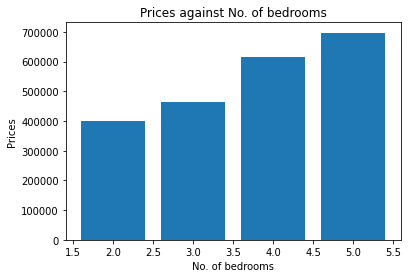

In [190]:
# Plotting a bar graph of Prices against No. of bedrooms
plt.bar(bd.bedrooms, bd.price)
plt.title('Prices against No. of bedrooms')
plt.xlabel('No. of bedrooms')
plt.ylabel('Prices')
plt.show()

In [191]:
bt = prices.groupby('bathrooms')['price'].mean().reset_index()
bt

,bathrooms,price
0,0,316096.851064
1,1,398460.782460
2,2,543342.258982
3,3,891817.583019


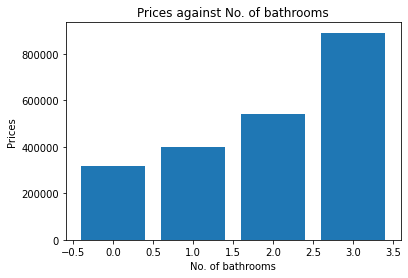

In [192]:
# Plotting a bar graph of Prices against No. of bathrooms
plt.bar(bt.bathrooms, bt.price )
plt.title('Prices against No. of bathrooms')
plt.xlabel('No. of bathrooms')
plt.ylabel('Prices')
plt.show()

In [193]:
fl = prices.groupby('floors')['price'].mean().reset_index()
fl

,floors,price
0,1,457156.231368
1,2,618177.728589
2,3,549116.450085


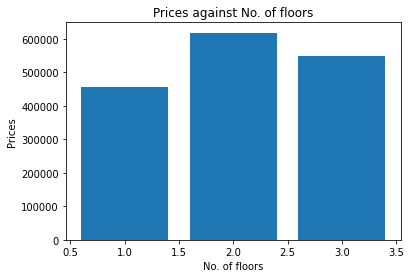

In [194]:
# Plotting a bar graph of Prices against No. of floors
plt.bar(fl.floors, fl.price)
plt.title('Prices against No. of floors')
plt.xlabel('No. of floors')
plt.ylabel('Prices')
plt.show()

In [195]:
gr = prices.groupby('grade')['price'].mean().reset_index()
gr

,grade,price
0,4,2.076667e+05
1,5,2.479620e+05
2,6,3.012894e+05
3,7,4.009782e+05
4,8,5.391691e+05
5,9,7.674727e+05
6,10,1.026033e+06
7,11,1.372396e+06
8,12,1.957500e+06
9,13,2.200000e+06


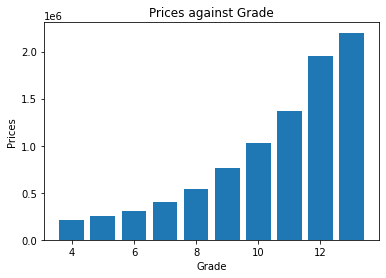

In [196]:
# Plotting a bar graph of Prices against Grade
plt.bar(gr.grade, gr.price)
plt.title('Prices against Grade')
plt.xlabel('Grade')
plt.ylabel('Prices')
plt.show()

Observations

- Houses with 5 bedrooms have the highest mean prices
- Houses with 3 bathrooms have the highest mean 
- Houses with 2 floors have the highest mean prices
- Houses graded 13 had the highest mean prices

## 6. Implementing the Solution

### Multicollinearity

In [197]:
# Checking the columns in the dataset
prices.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [198]:
# Getting the correlations of the Independent variables
ind = prices[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15']]

correlation = ind.corr()
correlation

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
bedrooms,1.000000,0.427467,0.580466,0.027957,0.145649,-0.019508,0.062265,0.022853,0.349034,0.476521,0.269949,0.411076,0.027609
bathrooms,0.427467,1.000000,0.637804,0.061448,0.496832,0.032439,0.133501,-0.135471,0.571162,0.582201,0.190713,0.478519,0.055286
sqft_living,0.580466,0.637804,1.000000,0.157022,0.342336,0.083145,0.255086,-0.060288,0.746163,0.860818,0.392980,0.759976,0.171144
sqft_lot,0.027957,0.061448,0.157022,1.000000,-0.018989,0.023498,0.069994,-0.009304,0.101246,0.168629,0.001245,0.139289,0.699580
floors,0.145649,0.496832,0.342336,-0.018989,1.000000,0.013745,0.005375,-0.297988,0.465903,0.518137,-0.269213,0.282946,-0.026111
waterfront,-0.019508,0.032439,0.083145,0.023498,0.013745,1.000000,0.388554,0.014118,0.074135,0.053458,0.065406,0.076839,0.035615
view,0.062265,0.133501,0.255086,0.069994,0.005375,0.388554,1.000000,0.046611,0.227168,0.131990,0.258515,0.261871,0.069607
condition,0.022853,-0.135471,-0.060288,-0.009304,-0.297988,0.014118,0.046611,1.000000,-0.153817,-0.166305,0.183030,-0.095623,-0.001774
grade,0.349034,0.571162,0.746163,0.101246,0.465903,0.074135,0.227168,-0.153817,1.000000,0.737459,0.121306,0.699362,0.109170
sqft_above,0.476521,0.582201,0.860818,0.168629,0.518137,0.053458,0.131990,-0.166305,0.737459,1.000000,-0.129685,0.727811,0.183553


In [199]:
# Getting the VIFs of the Independent variables
pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
bedrooms,1.614990,-0.248693,-1.385112e+00,0.043923,0.116174,0.059275,0.115063,-0.067099,0.295955,2.760027e-01,1.691018e-01,-0.023470,0.089479
bathrooms,-0.248693,2.064532,-5.520464e-01,-0.026621,-0.695880,0.018537,0.015589,0.042754,-0.258308,-1.362193e-01,-3.064933e-01,0.058031,0.029195
sqft_living,-1.385936,-0.552019,-1.577964e+13,-0.080062,0.900232,0.010167,-0.679555,0.252679,-1.516840,1.463370e+13,8.098843e+12,-0.460721,0.000162
sqft_lot,0.043923,-0.026621,-8.043647e-02,1.975024,0.084898,0.025700,-0.049771,0.018435,0.000125,-1.307120e-01,2.071442e-02,0.106750,-1.358219
floors,0.116174,-0.695880,9.005344e-01,0.084898,1.906356,-0.012199,0.006432,0.262781,-0.454789,-1.271318e+00,5.308070e-02,0.290171,0.102472
waterfront,0.059275,0.018537,1.013304e-02,0.025700,-0.012199,1.183959,-0.473114,-0.003147,0.022214,-9.798323e-02,-5.545612e-03,0.052979,-0.025934
view,0.115063,0.015589,-6.796947e-01,-0.049771,0.006432,-0.473114,1.344306,-0.044329,-0.135649,6.533747e-01,6.864175e-02,-0.246968,0.009850
condition,-0.067099,0.042754,2.530237e-01,0.018435,0.262781,-0.003147,-0.044329,1.121326,0.071056,-2.902948e-01,-2.692944e-01,0.065028,-0.010423
grade,0.295955,-0.258308,-1.515467e+00,0.000125,-0.454789,0.022214,-0.135649,0.071056,2.942071,-4.838655e-03,2.351586e-01,-0.785131,0.083572
sqft_above,0.275528,-0.135952,1.463370e+13,-0.131092,-1.271354,-0.098072,0.653462,-0.289913,-0.003703,-1.357098e+13,-7.510694e+12,-1.208773,-0.190220


Grade has the highest VIF of 2.942 so we will remove it.

In [200]:
# Getting the VIFs of the Independent variables without variable grade
rev = ind.drop(columns=['grade'])

correlations = rev.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,sqft_living15,sqft_lot15
bedrooms,1.585219,-0.222709,-1.234154e+00,0.043911,0.161923,0.057040,0.128709,-0.074247,2.754919e-01,1.442827e-01,0.055509,0.081072
bathrooms,-0.222709,2.041853,-6.858759e-01,-0.026610,-0.735810,0.020488,0.003680,0.048993,-1.350243e-01,-2.849850e-01,-0.010902,0.036533
sqft_living,-1.233276,-0.685207,-1.577306e+13,-0.079970,0.664998,0.021562,-0.749008,0.289031,1.462760e+13,8.095468e+12,-0.867881,0.043066
sqft_lot,0.043911,-0.026610,-8.046702e-02,1.975024,0.084918,0.025699,-0.049765,0.018432,-1.308909e-01,2.082201e-02,0.106783,-1.358223
floors,0.161923,-0.735810,6.653449e-01,0.084918,1.836054,-0.008765,-0.014537,0.273765,-1.272697e+00,9.034319e-02,0.168804,0.115390
waterfront,0.057040,0.020488,2.150301e-02,0.025699,-0.008765,1.183792,-0.472090,-0.003684,-9.796376e-02,-7.282677e-03,0.058907,-0.026565
view,0.128709,0.003680,-7.492062e-01,-0.049765,-0.014537,-0.472090,1.338052,-0.041052,6.532436e-01,7.922986e-02,-0.283168,0.013703
condition,-0.074247,0.048993,2.896244e-01,0.018432,0.273765,-0.003684,-0.041052,1.119610,-2.899226e-01,-2.749346e-01,0.083990,-0.012442
sqft_above,0.275831,-0.136266,1.462760e+13,-0.131117,-1.271223,-0.097990,0.652842,-0.289563,-1.356532e+13,-7.507563e+12,-1.207563,-0.189945
sqft_basement,0.145750,-0.285260,8.095468e+12,0.020605,0.090667,-0.007299,0.079078,-0.274717,-7.507563e+12,-4.154970e+12,-0.157820,-0.015724


All scores dropped, but the sqft_living15's dropped more hence this shows that grade and sqft_living15 were colinear.

In [260]:
prices.drop(['grade', 'sqft_living15'], axis = 1, inplace = True)

In [261]:
prices.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,sqft_lot15
0,221900.0,3,1,1180,5650,1,0,0,3,1180,0,5650
1,538000.0,3,2,2570,7242,2,0,0,3,2170,400,7639
2,180000.0,2,1,770,10000,1,0,0,3,770,0,8062
3,604000.0,4,3,1960,5000,1,0,0,5,1050,910,5000
4,510000.0,3,2,1680,8080,1,0,0,3,1680,0,7503


### Multiple Linear Regression

In [201]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [262]:
# Creating and fitting the model
X = prices.drop(['price'], axis = 1).values
y = prices['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [263]:
# Finding the predictions for prices based on our model
y_predict = regressor.predict(X_test)
y_predict

array([987591.89888526, 239892.08147907, 376793.61639435, ...,
       478501.80169418, 343632.25564149, 552973.26169399])

In [264]:
# Finding the descibe of the predictions
print(pd.DataFrame(y_predict).describe())

                  0
count  4.149000e+03
mean   5.220058e+05
std    2.305032e+05
min    1.502551e+03
25%    3.652260e+05
50%    4.686207e+05
75%    6.272596e+05
max    2.128991e+06


In [265]:
# Getting the MSE of the Multiple Linear Regression
mse = mean_squared_error(y_test, regressor.predict(X_test))
mse

50895290624.77141

In [266]:
# Getting the R2 score of the Multiple Linear Regression
regressor.score(X_test, y_test)

0.5342413166266315

In [267]:
# Getting the coefficients of the Multiple Linear Regression
coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_,prices.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 163.48796248381313,
 'bedrooms': 21460.28284523677,
 'condition': 90.00389262129738,
 'floors': 435958.29181383393,
 'price': -47773.25162481985,
 'sqft_above': 73.48407006128741,
 'sqft_basement': -0.6897493338092318,
 'sqft_living': 0.012979097677089158,
 'sqft_lot': 4546.695042910763,
 'view': 47111.38490315269,
 'waterfront': 72966.46991820289}

Residual Test

In [268]:
# Getting the residuals of the Multiple Linear Regression
residuals = np.subtract(y_predict, y_test)
print(pd.DataFrame(residuals).describe())
residuals.mean()

                  0
count  4.149000e+03
mean  -2.411175e+03
std    2.256142e+05
min   -2.890417e+06
25%   -9.564551e+04
50%    1.521131e+04
75%    1.297421e+05
max    1.110476e+06


-2411.174562194564

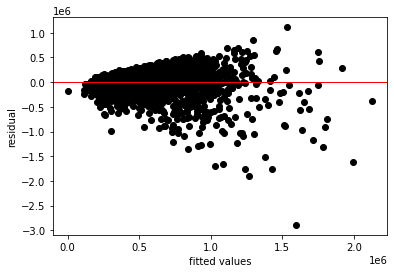

In [269]:
# Plotting a residual plot
import matplotlib.pyplot as plt

plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

The residuals are close to the mean which is very close to 0

Heteroscedasticity

In [270]:
# Testing for Heteroscedasticity of the Multiple Linear Regression
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# To interpret the results we will compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

print(test_result)

if (test_result > critical_value):
  print('the variances are unequal')
else:
  print('the variances are homogeneous')

1.9060946263793157
the variances are homogeneous


### Quantile Regression

In [273]:
# Creating and fitting the model at 0.5 quantile
X = prices.iloc[:, 1:10]
y = prices.iloc[:, 0]

import statsmodels.formula.api as smf

mod = smf.quantreg('y ~ X', prices)
res = mod.fit(q=.5)

print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2719
Model:                       QuantReg   Bandwidth:                   2.955e+04
Method:                 Least Squares   Sparsity:                    4.290e+05
Date:                Sat, 21 Nov 2020   No. Observations:                20741
Time:                        15:31:26   Df Residuals:                    20731
                                        Df Model:                            9
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.232e+04   1.16e+04      1.064      0.287   -1.04e+04     3.5e+04
X[0]       -4.992e+04   2362.797    -21.127      0.000   -5.45e+04   -4.53e+04
X[1]        1.306e+04   3294.330      3.966      0.000    6607.660    1.95e+04
X[2]         229.3854      4.426     51.829      0.0

In [274]:
# Getting coefficients in other quantiles.
quantiles = np.arange(0.1,1,0.4) 
 
for qt in quantiles: 
	res = mod.fit(q = qt)
 
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3968
Model:                       QuantReg   Bandwidth:                   2.723e+04
Method:                 Least Squares   Sparsity:                    1.238e+06
Date:                Sat, 21 Nov 2020   No. Observations:                20741
Time:                        15:31:45   Df Residuals:                    20731
                                        Df Model:                            9
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.655e+04    2.3e+04      2.023      0.043    1444.009    9.17e+04
X[0]       -5.173e+04   4442.808    -11.644      0.000   -6.04e+04    -4.3e+04
X[1]        7502.3669   5982.123      1.254      0.210   -4223.063    1.92e+04
X[2]         321.0874      7.984     40.217      0.0

### Ridge Regresssion

In [275]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [277]:
X = prices.drop(['price'], axis = 1)
y = prices['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-4,4,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

search.fit(X,y)
search.best_params_

{'alpha': 0.019306977288832496}

In [278]:
# Fitting the model
ridgeReg = Ridge(alpha=0.0193, normalize=True)

ridgeReg.fit(X_train,y_train)

r_pred = ridgeReg.predict(X_test)
r_pred

array([982062.88124867, 242836.90682382, 381266.09006951, ...,
       478472.28061992, 344406.7636824 , 546661.44436216])

In [279]:
# Calculating the MSE
mse = np.mean((r_pred - y_test)**2)
mse

50988246529.70703

In [280]:
 # Calculating the R2 score 
 ridgeReg.score(X_test,y_test)

0.5333906481391715

In [281]:
# Getting the coefficients of the Ridge Regression
coef_dict_baseline = {}
for coef, feat in zip(ridgeReg.coef_,prices.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 129.2650573478812,
 'bedrooms': 23267.215075083994,
 'condition': 118.04348877271863,
 'floors': 433006.10207818035,
 'price': -44137.67129146484,
 'sqft_above': 102.71412926508206,
 'sqft_basement': -0.6407087346188081,
 'sqft_living': 0.008143684104411308,
 'sqft_lot': 5753.458250250503,
 'view': 46110.007411593135,
 'waterfront': 72760.85523793638}

Residual

In [282]:
# Getting the Residuals of the Ridge Regression
residuals = np.subtract(r_pred, y_test)
print(pd.DataFrame(residuals).describe())
residuals.mean()

              price
count  4.149000e+03
mean  -2.417483e+03
std    2.258200e+05
min   -2.911982e+06
25%   -9.489468e+04
50%    1.565421e+04
75%    1.310246e+05
max    1.097665e+06


-2417.4834037147416

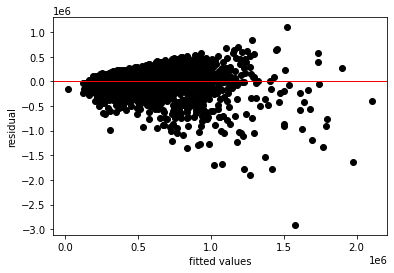

In [283]:
# Plotting a residual plot
import matplotlib.pyplot as plt

plt.scatter(r_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

The residuals are close to the mean which is very close to 0

Heteroscedasticity

In [284]:
# Testing for Heteroscedasticity
import scipy as sp

test_result, p_value = sp.stats.bartlett(r_pred, residuals)

# To interpret the results we will compute a critical value of the chi squared distribution
degree_of_freedom = len(r_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

print(test_result)

if (test_result > critical_value):
  print('the variances are unequal')
else:
  print('the variances are homogeneous')

0.35257701382178597
the variances are homogeneous


### Lasso Regression

In [285]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
warnings.filterwarnings("ignore")

X = prices.drop(['price'], axis = 1)
y = prices['price']

# Scaling data 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [286]:
# Finding the best parameters for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lassoReg = Lasso(normalize=True)
search = GridSearchCV(estimator=lassoReg,param_grid={'alpha':np.logspace(-4,4,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

search.fit(X,y)
search.best_params_

{'alpha': 3.727593720314938}

In [287]:
# Fitting the model
lassoReg = Lasso(alpha=3.728, normalize=True)

lassoReg.fit(X_train,y_train)

l_pred = lassoReg.predict(X_test)
l_pred

array([986648.88212429, 241421.2548989 , 376223.48432276, ...,
       478773.03178277, 344883.68320047, 552251.45082901])

In [288]:
# Calculating MSE
mse = np.mean((l_pred - y_test)**2)
mse

50929409289.01588

In [289]:
# Getting the R2 score of the Lasso Regression
lassoReg.score(X_test,y_test)

0.5339290860854184

In [290]:
# Getting the coefficients of the Lasso Regression
coef_dict_baseline = {}
for coef, feat in zip(lassoReg.coef_,prices.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 194003.17036571784,
 'bedrooms': 13501.542527954265,
 'condition': 12157.223683541051,
 'floors': 34731.572980817364,
 'price': -36655.51123456992,
 'sqft_above': 0.0,
 'sqft_basement': -16565.945854171154,
 'sqft_living': -0.0,
 'sqft_lot': 2247.445482950029,
 'view': 29898.65167665431,
 'waterfront': 53480.296602113594}

Residuals

In [291]:
# Getting the Residuals of the Lasso Regression
residuals = np.subtract(l_pred, y_test)
print(pd.DataFrame(residuals).describe())
residuals.mean()

              price
count  4.149000e+03
mean  -2.419671e+03
std    2.256897e+05
min   -2.895544e+06
25%   -9.576967e+04
50%    1.539826e+04
75%    1.295505e+05
max    1.103895e+06


-2419.671377347199

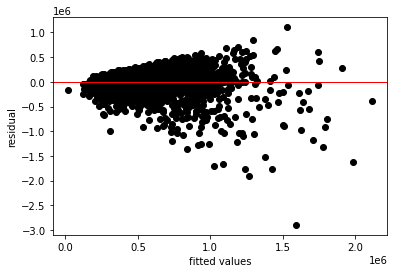

In [292]:
# Plotting a residual plot
import matplotlib.pyplot as plt

plt.scatter(l_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

The residuals are close to the mean which is very close to 0

Heteroscedasticity

In [293]:
# Testing for Heteroscedasticity
import scipy as sp

test_result, p_value = sp.stats.bartlett(l_pred, residuals)

# To interpret the results we will compute a critical value of the chi squared distribution
degree_of_freedom = len(l_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

print(test_result)

if (test_result > critical_value):
  print('the variances are unequal')
else:
  print('the variances are homogeneous')

1.2231278700499637
the variances are homogeneous


### ElasticNet Regression

In [295]:
from sklearn.linear_model import ElasticNet
import numpy as np
X = prices.drop(['price'], axis = 1)
y = prices['price']

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-4,4,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

# Getting the best parameters for the model
search.fit(X,y)
search.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.8}

In [296]:
# Fitting the model
elastic=ElasticNet(normalize=True,alpha=0.0001,l1_ratio=0.8)
elastic.fit(X,y)

# Calculating the predictions
y_pred = elastic.predict(X)
y_pred

array([310102.97946068, 613167.49223738, 244690.65864127, ...,
       268799.20772076, 441475.25942475, 268936.64605516])

In [297]:
# Getting the MSE of the Elastic Net Regression
elastic_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(elastic_model)

49224091448.7146


In [298]:
# Getting the R2 score of the Elastic Net Regression
elastic.score(X,y)

0.496429708438468

In [299]:
# Getting the coefficients of the Elastic Net Regression
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,prices.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 94.76912220059879,
 'bedrooms': 38415.649677830246,
 'condition': 85.42642395581314,
 'floors': 381864.60940387554,
 'price': -8865.943860065943,
 'sqft_above': 80.85785458247854,
 'sqft_basement': -0.2255964093497279,
 'sqft_living': 0.03357420322096432,
 'sqft_lot': 16399.742817463975,
 'view': 30654.914376647783,
 'waterfront': 64298.291413625804}

Residual

In [235]:
# Getting the Residuals of Elastic Net Regression
residuals = np.subtract(y_pred, y)
print(pd.DataFrame(residuals).describe())
residuals.mean()

              price
count  2.074100e+04
mean   6.140977e-11
std    2.218704e+05
min   -3.150788e+06
25%   -9.088519e+04
50%    2.612950e+04
75%    1.381084e+05
max    9.291472e+05


6.140976983310803e-11

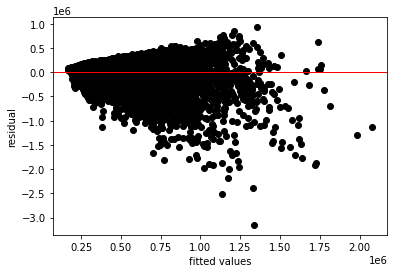

In [236]:
# Plotting a residual plot
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

The residuals are close to the mean which is very close to 0

Heteroscedasticity Test

In [237]:
# Testing for Heteroscedasticity
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we will compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

print(test_result)

if (test_result > critical_value):
  print('the variances are unequal')
else:
  print('the variances are homogeneous')

559.6336838974718
the variances are homogeneous


Observations.

- The models all had moderate R2 scores. 

- The model with the lowest R2 score was Quantile Regression with 0.3968 which means only 39.68% of variations in prices were explained by the independent variables. Hence, this model was not a suitable model to help the company predict the prices of the houses accurately.

- The model with the highest R2 score was Multiple Linear Regression with 0.5342 which means 53.42% of variations in price were explained by the independent variables. Hence, this model can help the company to predict the prices of the houses accurately.

- Lasso, Ridge and Elastic Net Regression Models have 0.5339, 0.5334, and 0.4964 R2 scores respectively which were not quite as bad.

- In Lasso, sqft_above and sqft_living coefficients were reduced to absolute zeros but the same variables were include in Elastic Net which means Lasso removed variables which contained information.

- Quantile Regression model had a limitation because it did not consider all the independent variables since it left one out.

- In Ridge, the magnititude of the coefficients were high this is a limitation with this type of regression because it does not really reduce the magnititude of the coefficients to zero.

- The limitation of using Elastic Net is that it gives a small R2 score when there is a small set of feature like in our dataset. Elastic Net works best when there is a big dataset.

## 7. Challenging the Solution

The waterfront and view did not influence the prices of the houses. These variables ought to be removed and not considered when modelling the models. The data could have included the prices of the land the houses were bulit in because the could also have an influence on the prices of the houses.

## 8. Follow up Questions

a) Did we have the right data?

Yes the data was right since it had prices of the houses and features of houses that influence how houses are priced.

b) Do we need other data to answer our question?

The data was enough to enable a model to be build from it.

c) Did we have the right question?

The question was right according to the dataset being investigated.